# LSTM (Long Short-Term Memory networks) Models for Time Series Forecasting

1. Univariate time series forecasting
2. Multivariate time series forecasting
3. Multi-step time series forecasting
4. Multivariate Multi-Step time series forecasting

## 1. Univariate time series forecasting LSTM models
###  i) Vanilla LSTM
###  ii) Stacked LSTM
###  iii) Bidirectional LSTM
###  iv) CNN LSTM
###  v) ConvLSTM

Each of these models are demonstrated for one-step univariate time series forecasting, but can easily be adapted and used as the input part of a model for other types of time series forecasting problems.

### Dataset

U.S. Bureau of Economic Analysis, Population [POPTHM], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/POPTHM, January 7, 2021.

This is a dataset from the U.S. Census Bureau hosted by the Federal Reserve Economic Database (FRED). Population includes resident population plus armed forces overseas. The monthly estimate is the average of estimates for the first of the month and the first of the following month.
BEA Account Code: B230RC

Observation:Nov 2020: 330,829
Updated: Dec 23, 2020
Units: Thousands, Not Seasonally Adjusted
Frequency: Monthly

In [249]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('POPTHM.csv', index_col=0)
print(df1.columns)
print(df1.index)
df1.head()

Index(['POPTHM'], dtype='object')
Index(['1/1/1959', '2/1/1959', '3/1/1959', '4/1/1959', '5/1/1959', '6/1/1959',
       '7/1/1959', '8/1/1959', '9/1/1959', '10/1/1959',
       ...
       '2/1/2020', '3/1/2020', '4/1/2020', '5/1/2020', '6/1/2020', '7/1/2020',
       '8/1/2020', '9/1/2020', '10/1/2020', '11/1/2020'],
      dtype='object', name='DATE', length=743)


,POPTHM
DATE,
1/1/1959,175818
2/1/1959,176044
3/1/1959,176274
4/1/1959,176503
5/1/1959,176723


In [63]:
import datetime

# Convert index to DatetimeIndex type 
fixed_dates_df = df1.copy()
fixed_dates_df = fixed_dates_df.set_index(fixed_dates_df.index.to_series().apply(pd.to_datetime))

df1 = fixed_dates_df
print(df1.index)
df1.tail()

DatetimeIndex(['1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01',
               ...
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01'],
              dtype='datetime64[ns]', name='DATE', length=743, freq=None)


,POPTHM
DATE,
2020-07-01,330199
2020-08-01,330368
2020-09-01,330535
2020-10-01,330692
2020-11-01,330829


<AxesSubplot:xlabel='DATE'>

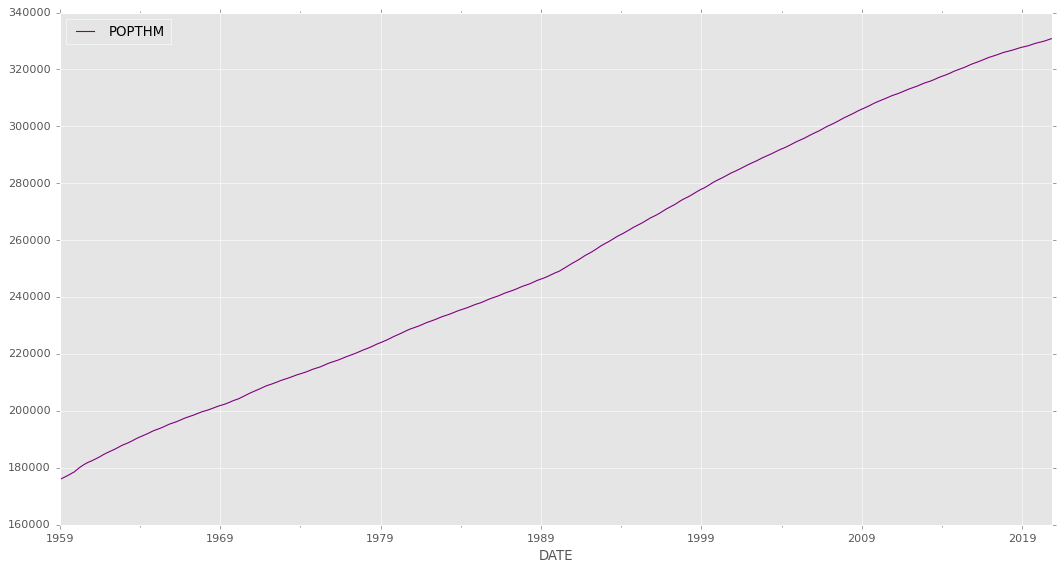

In [64]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [16, 8]

df1.plot(color="purple")

In [202]:
# Split train, test data
# Since this is a single step forecast, only the last index is removed from training dataset
train_seq1 = df1[-201:-1]['POPTHM'] # LSTM perform best between 200 ~ 400 datapoint
test_seq1 = df1.iloc[-1]['POPTHM']
print(type(train_seq1))
print("Shape of dataset: ", train_seq1.shape)
print("train", train_seq1.tail())
print("test", test_seq1)

<class 'pandas.core.series.Series'>
Shape of dataset:  (200,)
train DATE
2020-06-01    330038
2020-07-01    330199
2020-08-01    330368
2020-09-01    330535
2020-10-01    330692
Name: POPTHM, dtype: int64
test 330829


### Data Preprocessing

##### The LSTM model will learn a function that maps a sequence of past observations as input to an output observation. As such, the sequence of observations must be transformed into multiple examples from which the LSTM can learn.

In [192]:
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    x, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return array(x), array(y) # x = [samples, timesteps]

In [193]:
# Splits the univariate series into six samples where each sample has three input time steps and one output time step.
input_sequence = train_seq1 # Training dataset

# choose a number of time steps
n_steps = 3

# split into samples
x, y = split_sequence(input_sequence, n_steps)

# summarize the databb
for i in range(len(x)):
	print(x[i], y[i])

n_features = 1 # univariate
# reshape from [samples, timesteps] into [samples, timesteps, features]
x = x.reshape((x.shape[0], x.shape[1], n_features))

[292434 292651 292872] 293103
[292651 292872 293103] 293350
[292872 293103 293350] 293603
[293103 293350 293603] 293857
[293350 293603 293857] 294104
[293603 293857 294104] 294337
[293857 294104 294337] 294561
[294104 294337 294561] 294768
[294337 294561 294768] 294955
[294561 294768 294955] 295149
[294768 294955 295149] 295359
[294955 295149 295359] 295582
[295149 295359 295582] 295824
[295359 295582 295824] 296077
[295582 295824 296077] 296338
[295824 296077 296338] 296606
[296077 296338 296606] 296857
[296338 296606 296857] 297089
[296606 296857 297089] 297311
[296857 297089 297311] 297526
[297089 297311 297526] 297734
[297311 297526 297734] 297950
[297526 297734 297950] 298170
[297734 297950 298170] 298401
[297950 298170 298401] 298653
[298170 298401 298653] 298910
[298401 298653 298910] 299178
[298653 298910 299178] 299452
[298910 299178 299452] 299710
[299178 299452 299710] 299950
[299452 299710 299950] 300178
[299710 299950 300178] 300398
[299950 300178 300398] 300608
[300178 30

In [208]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def model_eval(y, predictions):    
        # Mean absolute error (MAE)
        mae = mean_absolute_error(y, predictions)
    
        # Mean squared error (MSE)
        mse = mean_squared_error(y, predictions)
    
    
        # SMAPE is an alternative for MAPE when there are zeros in the testing data. It
        # scales the absolute percentage by the sum of forecast and observed values
        SMAPE = np.mean(np.abs((y - predictions) / ((y + predictions)/2))) * 100
    
    
        # Calculate the Root Mean Squared Error
        rmse = np.sqrt(mean_squared_error(y, predictions))
    
        # Calculate the Mean Absolute Percentage Error
        # y, predictions = check_array(y, predictions)
        MAPE = np.mean(np.abs((y - predictions) / y)) * 100
    
        # mean_forecast_error
        mfe = np.mean(y - predictions)
    
        # NMSE normalizes the obtained MSE after dividing it by the test variance. It
        # is a balanced error measure and is very effective in judging forecast
        # accuracy of a model.
    
        # normalised_mean_squared_error
        NMSE = mse / (np.sum((y - np.mean(y)) ** 2)/(len(y)-1))
    
    
        # theil_u_statistic
        # It is a normalized measure of total forecast error.
        error = y - predictions
        mfe = np.sqrt(np.mean(predictions**2))
        mse = np.sqrt(np.mean(y**2))
        rmse = np.sqrt(np.mean(error**2))
        theil_u_statistic =  rmse / (mfe*mse)
    
    
        # mean_absolute_scaled_error
        # This evaluation metric is used to over come some of the problems of MAPE and
        # is used to measure if the forecasting model is better than the naive model or
        # not.
    
        
        # Print metrics
        print('Mean Absolute Error:', round(mae, 3))
        print('Mean Squared Error:', round(mse, 3))
        print('Root Mean Squared Error:', round(rmse, 3))
        print('Mean absolute percentage error:', round(MAPE, 3))
        print('Scaled Mean absolute percentage error:', round(SMAPE, 3))
        print('Mean forecast error:', round(mfe, 3))
        print('Normalised mean squared error:', round(NMSE, 3))
        print('Theil_u_statistic:', round(theil_u_statistic, 3))

## Vanilla LSTM
 
#### Contains single hidden layer of LSTM units, and an output layer used to make a prediction.
#### Three-dimensiona model input = [samples, timesteps, features]

1/1 [==============================] - 0s 2ms/step


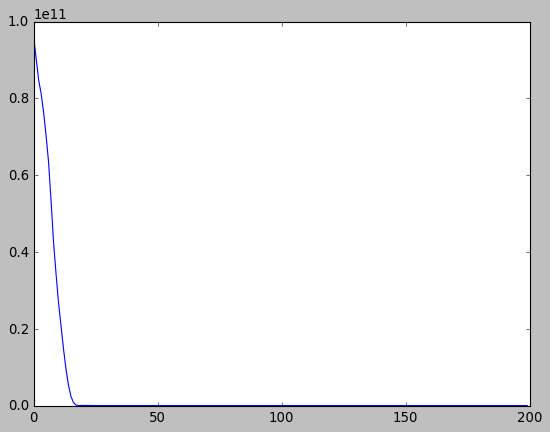

In [209]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
n_features = 1 # univariate

# define model 
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps, n_features))) # 50 LSTM units in the hidden layer
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse') #  Adam version of stochastic gradient descent 

# fit model
history = model.fit(x, y, epochs=200, verbose=0)
plt.style.use('classic')
plt.plot(history.history["loss"])

# Prediction
x_input = input_sequence[-3:].to_numpy()
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=1)


In [221]:
print("actual", array([[test_seq1]]))
print("prediction", yhat) # Expected ans: 2020-11-01	330829

actual [[330829]]
prediction [[330945.34]]


In [216]:
model_eval(array([test_seq1]), yhat)

Mean Absolute Error: 116.344
Mean Squared Error: 330829.0
Root Mean Squared Error: 116.344
Mean absolute percentage error: 0.035
Scaled Mean absolute percentage error: 0.035
Mean forecast error: 330945.34
Normalised mean squared error: nan
Theil_u_statistic: 0.0


D:\Users\Yuzhe\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


 The forecast's distance from the true value is 0.037% of the true value, which is good as the forecast value is only off by 0.037%

# Stacked LSTM

#### Multiple hidden LSTM layers can be stacked one on top of another.

In [211]:
n_steps = 3
n_features = 1 # univariate

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features))) #3D output from hidden LSTM layer as input to the next.
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(x, y, epochs=200, verbose=0)

# demonstrate prediction
x_input = input_sequence[-3:].to_numpy()
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print("actual", array([[test_seq1]]))
print("prediction", yhat) # Expected ans: 2020-11-01	330829
model_eval(array([test_seq1]), yhat)

actual [[330829]]
prediction [[330932.56]]
Mean Absolute Error: 103.562
Mean Squared Error: 330829.0
Root Mean Squared Error: 103.562
Mean absolute percentage error: 0.031
Scaled Mean absolute percentage error: 0.031
Mean forecast error: 330932.56
Normalised mean squared error: nan
Theil_u_statistic: 0.0


D:\Users\Yuzhe\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


## Bidirectional LSTM

#### LSTM model to learn the input sequence both forward and backwards and concatenate both interpretations.
#### Wrap the first hidden layer in a wrapper layer called Bidirectional.

In [212]:
from keras.layers import Bidirectional

n_steps = 3
n_features = 1

# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(x, y, epochs=200, verbose=0)

# demonstrate prediction
x_input = input_sequence[-3:].to_numpy()
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print("actual", array([[test_seq1]]))
print("prediction", yhat) # Expected ans: 2020-11-01	330829
model_eval(array([test_seq1]), yhat)

actual [[330829]]
prediction [[330937.7]]
Mean Absolute Error: 108.688
Mean Squared Error: 330829.0
Root Mean Squared Error: 108.688
Mean absolute percentage error: 0.033
Scaled Mean absolute percentage error: 0.033
Mean forecast error: 330937.7
Normalised mean squared error: nan
Theil_u_statistic: 0.0


D:\Users\Yuzhe\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


## CNN LSTM

#### CNN is used to interpret subsequences of input that together are provided as a sequence to an LSTM model to interpret

In [213]:
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

n_steps = 4
# split into samples
x, y = split_sequence(input_sequence, n_steps)

# Each sample can then be split into two sub-samples, each with two time steps. 
# So the CNN can interpret each subsequence of two time steps and provide a 
# time series of interpretations of the subsequences to the LSTM model to process as input.
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
x = x.reshape((x.shape[0], n_seq, n_steps, n_features))

# define model
model = Sequential()
# TimeDistributed wrapper to apply the entire model once per input subsequence 
# Reuse the same CNN model when reading in each sub-sequence of data separately
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2))) # distills the filter maps down to 1/2 of their size that includes the most salient features
model.add(TimeDistributed(Flatten())) # single input time step
model.add(LSTM(50, activation='relu')) 
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(x, y, epochs=500, verbose=0)

# demonstrate prediction
x_input = input_sequence[-4:].to_numpy()
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print("actual", array([[test_seq1]]))
print("prediction", yhat) # Expected ans: 2020-11-01	330829
model_eval(array([test_seq1]), yhat)

actual [[330829]]
prediction [[330931.44]]
Mean Absolute Error: 102.438
Mean Squared Error: 330829.0
Root Mean Squared Error: 102.438
Mean absolute percentage error: 0.031
Scaled Mean absolute percentage error: 0.031
Mean forecast error: 330931.44
Normalised mean squared error: nan
Theil_u_statistic: 0.0


D:\Users\Yuzhe\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


## ConvLSTM

#### Convolutional reading of input is built directly into each LSTM unit
#### Developed for reading two-dimensional spatial-temporal data, but can be adapted for use with univariate time series forecasting

In [214]:
from keras.layers import ConvLSTM2D

# choose a number of time steps
n_steps = 4

# split into samples
x, y = split_sequence(input_sequence, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
# as the layer expects input as a sequence of two-dimensional images
n_features = 1
n_seq = 2
n_steps = 2
# timesteps = number of subsequences, or n_seq
# columns = number of time steps for each subsequence, or n_steps
# number of rows is fixed at 1 for one-dimensional data
x = x.reshape((x.shape[0], n_seq, 1, n_steps, n_features))

# define model
model = Sequential()
# two-dimensional kernel size in terms of (rows, columns)
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(x, y, epochs=500, verbose=0)

# demonstrate prediction
x_input = input_sequence[-4:].to_numpy()
x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print("actual", array([[test_seq1]]))
print("prediction", yhat) # Expected ans: 2020-11-01	330829
model_eval(array([test_seq1]), yhat)

actual [[330829]]
prediction [[330945.34]]
Mean Absolute Error: 116.344
Mean Squared Error: 330829.0
Root Mean Squared Error: 116.344
Mean absolute percentage error: 0.035
Scaled Mean absolute percentage error: 0.035
Mean forecast error: 330945.34
Normalised mean squared error: nan
Theil_u_statistic: 0.0


D:\Users\Yuzhe\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


## 2. Multivariate time series forecasting LSTM models
###    i) Multiple Input Series
###   ii) Multiple Parallel Series

Multivariate time series data means data where there is more than one observation for each time step.

## Data Preprocessing

In [316]:
from numpy import hstack

# split a multivariate sequence into samples
# x component has a three-dimensional structure
def split_multi_seq(sequences, n_steps):
	x, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		x.append(seq_x)
		y.append(seq_y)
	return array(x), array(y)

## Multiple Input Series
Two or more parallel input time series and an output time series that is dependent on the input time series

## Dataset
Simple example of two parallel input time series where the output series is the simple addition of the input series.

eg
input:

10, 15

20, 25

30, 35

output:
65


In [327]:
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95, 105])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# multivariate data preparation
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1)) # output series

# horizontally stack columns
# each row is a time step, and each column is a separate time series
# standard way of storing parallel time series in a CSV file
dataset = hstack((in_seq1, in_seq2, out_seq))

# number of time steps
n_steps = 3
# convert into input/output
x, y = split_multi_seq(dataset, n_steps)

# x.shape = (number of samples, number of time steps per sample, number of parallel time series)
print(x.shape, y.shape)

# summarize the data (2 input series, output)
for i in range(len(x)):
	print(x[i], y[i])


(8, 3, 2) (8,)
[[10 15]
 [20 25]
 [30 35]] 65
[[20 25]
 [30 35]
 [40 45]] 85
[[30 35]
 [40 45]
 [50 55]] 105
[[40 45]
 [50 55]
 [60 65]] 125
[[50 55]
 [60 65]
 [70 75]] 145
[[60 65]
 [70 75]
 [80 85]] 165
[[70 75]
 [80 85]
 [90 95]] 185
[[ 80  85]
 [ 90  95]
 [100 105]] 205


In [331]:
# Split train, validation data
# Since this is a single step forecast, only the last index is removed from training dataset
train_x = x[:-1]
train_y = y[:-1]
valid_x = x[-1]
valid_y = y[-1]
print("train x", train_x[-5:])
print("train y", train_y[-5:])

print("Validation x", valid_x)
print("Validation y", valid_y)


train x [[[30 35]
  [40 45]
  [50 55]]

 [[40 45]
  [50 55]
  [60 65]]

 [[50 55]
  [60 65]
  [70 75]]

 [[60 65]
  [70 75]
  [80 85]]

 [[70 75]
  [80 85]
  [90 95]]]
train y [105 125 145 165 185]
Validation x [[ 80  85]
 [ 90  95]
 [100 105]]
Validation y 205


## Vanilla LSTM

In [340]:
n_steps = 3
n_features = train_x.shape[2]

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(train_x, train_y, epochs=200, verbose=0)

x_input = array(valid_x)
x_input = x_input.reshape((1, n_steps, n_features))

# prediction
yhat = model.predict(x_input, verbose=0)
print("actual", array([[valid_y]]))
print("prediction", yhat)
model_eval(array([valid_y]), yhat)

actual [[205]]
prediction [[205.6115]]
Mean Absolute Error: 0.611
Mean Squared Error: 205.0
Root Mean Squared Error: 0.611
Mean absolute percentage error: 0.298
Scaled Mean absolute percentage error: 0.298
Mean forecast error: 205.612
Normalised mean squared error: nan
Theil_u_statistic: 0.0


D:\Users\Yuzhe\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


## Multiple Parallel Series/ multivariate forecasting

The case where there are multiple parallel time series and a value must be predicted for each.

In [ ]:
# split a multivariate sequence into samples
# X is three-dimensiona = number of sample, number of time steps chosen per sample, number of parallel time series or features
# y is two-dimensional = number of samples, number of time variables per sample to be predicted
def split_parallel_seq(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [342]:
# input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95, 105])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps = 3

# convert into input/output
x, y = split_parallel_seq(dataset, n_steps)

print(x.shape, y.shape)

# summarize the data
for i in range(len(x)):
	print(x[i], y[i])

(7, 3, 3) (7, 3)
[[10 15 25]
 [20 25 45]
 [30 35 65]] [40 45 85]
[[20 25 45]
 [30 35 65]
 [40 45 85]] [ 50  55 105]
[[ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]] [ 60  65 125]
[[ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]] [ 70  75 145]
[[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]] [ 80  85 165]
[[ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]] [ 90  95 185]
[[ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]] [100 105 205]


In [343]:
# Split train, validation data
# Since this is a single step forecast, only the last index is removed from training dataset
train_x = x[:-1]
train_y = y[:-1]
valid_x = x[-1]
valid_y = y[-1]
print("train x", train_x[-5:])
print("train y", train_y[-5:])

print("Validation x", valid_x)
print("Validation y", valid_y)

train x [[[ 20  25  45]
  [ 30  35  65]
  [ 40  45  85]]

 [[ 30  35  65]
  [ 40  45  85]
  [ 50  55 105]]

 [[ 40  45  85]
  [ 50  55 105]
  [ 60  65 125]]

 [[ 50  55 105]
  [ 60  65 125]
  [ 70  75 145]]

 [[ 60  65 125]
  [ 70  75 145]
  [ 80  85 165]]]
train y [[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]
Validation x [[ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]
Validation y [100 105 205]


## Stacked LSTM


In [344]:
n_steps = 3
n_features = train_x.shape[2] # dataset knows the number of features

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(train_x, train_y, epochs=400, verbose=0)
# demonstrate prediction
x_input = array(valid_x)
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print("actual", array([[valid_y]]))
print("prediction", yhat) # Expected ans: 2020-11-01	330829
model_eval(array([valid_y]), yhat)

actual [[[100 105 205]]]
prediction [[100.26913 105.58375 206.08334]]
Mean Absolute Error: 0.645
Mean Squared Error: 144.971
Root Mean Squared Error: 0.727
Mean absolute percentage error: 0.451
Scaled Mean absolute percentage error: 0.45
Mean forecast error: 145.685
Normalised mean squared error: 0.0
Theil_u_statistic: 0.0


D:\Users\Yuzhe\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars


## 3. Univariate Multi-Step time series forecasting LSTM models
### i) Vector Output Model
### ii) Encoder-Decoder Model

In [346]:
# Data preprocessing
def split_multistep_seq(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [355]:
# Split train, test data
# Since this is a single step forecast, only the last index is removed from training dataset
train_seq3 = df1[-202:-2]['POPTHM'] # LSTM perform best between 200 ~ 400 datapoint
test_seq3 = df1.iloc[-2:]['POPTHM'] # PRedict 2 steps ahead

print(type(train_seq3))
print("Shape of dataset: ", train_seq3.shape)
print("train", train_seq3.tail())
print("test", test_seq3)

<class 'pandas.core.series.Series'>
Shape of dataset:  (200,)
train DATE
5/1/2020    329894
6/1/2020    330038
7/1/2020    330199
8/1/2020    330368
9/1/2020    330535
Name: POPTHM, dtype: int64
test DATE
10/1/2020    330692
11/1/2020    330829
Name: POPTHM, dtype: int64


## i) Vector Output Model
## Stacked LSTM

One time step of each output time series was forecasted as a vector

In [356]:
# input sequence
raw_seq = train_seq3

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2 # input, output steps 

# split into samples
x, y = split_multistep_seq(raw_seq, n_steps_in, n_steps_out)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
x = x.reshape((x.shape[0], x.shape[1], n_features))

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(x, y, epochs=50, verbose=0)

# prediction
x_input = array(train_seq3[-3:])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print("actual", array([[test_seq3]]))
print("prediction", yhat) 
model_eval(array([test_seq3]), yhat)

actual [[[330692 330829]]]
prediction [[330802.16 331003.53]]
Mean Absolute Error: 142.344
Mean Squared Error: 330760.507
Root Mean Squared Error: 145.938
Mean absolute percentage error: 0.043
Scaled Mean absolute percentage error: 0.043
Mean forecast error: 330902.84
Normalised mean squared error: 0.0
Theil_u_statistic: 0.0


D:\Users\Yuzhe\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars


## ii) Encoder-Decoder Model

sequence-to-sequence / input and output sequences / seq2seq
1. Encoder = responsible for reading and interpreting the input sequence
    Traditionally a Vanilla LSTM model
    output = a fixed length vector that represents the model’s interpretation of the sequence
2. fixed-length output of the encoder is repeated, once for each required time step in the output sequence
3. Decoder =   output a value for each value in the output time step

In [413]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

# input sequence
raw_seq = train_seq3

# time steps
n_steps_in, n_steps_out = 3, 2

# split into samples
X, y = split_multistep_seq(raw_seq, n_steps_in, n_steps_out)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# output/y of the training dataset must be three-dimensional shape of [samples, timesteps, features]
y = y.reshape((y.shape[0], y.shape[1], n_features))

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
# use the same output layer or layers to make each one-step prediction in the output sequence.
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=100, verbose=0)

# prediction
x_input = array(train_seq3[-3:])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)

In [379]:
print("Step 1:")
print("actual", array([[test_seq3[0]]]))
print("prediction", yhat[0][0]) 
model_eval(array([test_seq3[0]]), yhat[0][0])

print("\nStep 2:")
print("actual", array([[test_seq3[1]]]))
print("prediction", yhat[0][1]) 
model_eval(array([test_seq3[1]]), yhat[0][1])

Step 1:
actual [[330692]]
prediction [330773.5]
Mean Absolute Error: 81.5
Mean Squared Error: 330692.0
Root Mean Squared Error: 81.5
Mean absolute percentage error: 0.025
Scaled Mean absolute percentage error: 0.025
Mean forecast error: 330773.5
Normalised mean squared error: nan
Theil_u_statistic: 0.0

Step 2:
actual [[330829]]
prediction [330918.03]
Mean Absolute Error: 89.031
Mean Squared Error: 330829.0
Root Mean Squared Error: 89.031
Mean absolute percentage error: 0.027
Scaled Mean absolute percentage error: 0.027
Mean forecast error: 330918.03
Normalised mean squared error: nan
Theil_u_statistic: 0.0


D:\Users\Yuzhe\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars
D:\Users\Yuzhe\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


## 4. Multivariate Multi-Step time series forecasting LSTM models
### i) Multiple Input Multi-Step Output
### ii) Multiple Parallel Input and Multi-Step Output

## i) Multiple Input Multi-Step Output¶

In [421]:
# split a multivariate sequence into samples
def split_multi_variate_step(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# time steps
n_steps_in, n_steps_out = 3, 2

# covert into input/output
x, y = split_multi_variate_step(dataset, n_steps_in, n_steps_out)

In [422]:
# Split train, validation data
# Since this is a single step forecast, only the last index is removed from training dataset
train_x = x[:-2]
train_y = y[:-2]
valid_x = x[-2:-1]
valid_y = y[-2:-1]
print("train x", train_x[-5:])
print("train y", train_y[-5:])

print("Validation x", valid_x)
print("Validation y", valid_y)

train x [[[10 15]
  [20 25]
  [30 35]]

 [[20 25]
  [30 35]
  [40 45]]

 [[30 35]
  [40 45]
  [50 55]]

 [[40 45]
  [50 55]
  [60 65]]]
train y [[ 65  85]
 [ 85 105]
 [105 125]
 [125 145]]
Validation x [[[50 55]
  [60 65]
  [70 75]]]
Validation y [[145 165]]


In [432]:
# the dataset knows the number of features, e.g. 2
n_features = train_x.shape[2]

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(train_x, train_y, epochs=200, verbose=0)

# prediction
x_input = valid_x
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print("actual", valid_y)
print("prediction", yhat)
model_eval(valid_y, yhat)

actual [[145 165]]
prediction [[147.56807 170.15536]]
Mean Absolute Error: 3.862
Mean Squared Error: 155.322
Root Mean Squared Error: 4.073
Mean absolute percentage error: 2.448
Scaled Mean absolute percentage error: 2.416
Mean forecast error: 159.263
Normalised mean squared error: 0.0
Theil_u_statistic: 0.0


D:\Users\Yuzhe\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in double_scalars


## ii) Multiple Parallel Input and Multi-Step Output

In [435]:
# split a multivariate sequence into samples
def split_prl_multi_variate_step(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2

# covert into input/output
x, y = split_prl_multi_variate_step(dataset, n_steps_in, n_steps_out)

In [437]:
# Split train, validation data
# Since this is a single step forecast, only the last index is removed from training dataset
train_x = x[:-2]
train_y = y[:-2]
valid_x = x[-1]
valid_y = y[-1]
print("train x", train_x[-5:])
print("train y", train_y[-5:])

print("Validation x", valid_x)
print("Validation y", valid_y)

train x [[[ 10  15  25]
  [ 20  25  45]
  [ 30  35  65]]

 [[ 20  25  45]
  [ 30  35  65]
  [ 40  45  85]]

 [[ 30  35  65]
  [ 40  45  85]
  [ 50  55 105]]]
train y [[[ 40  45  85]
  [ 50  55 105]]

 [[ 50  55 105]
  [ 60  65 125]]

 [[ 60  65 125]
  [ 70  75 145]]]
Validation x [[ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]]
Validation y [[ 80  85 165]
 [ 90  95 185]]


In [454]:
# the dataset knows the number of features, e.g. 2
n_features = train_x.shape[2]

# define model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(200, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(train_x, train_y, epochs=300, verbose=0)

# prediction
x_input = valid_x
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)

In [470]:
print("actual", valid_y)
print("prediction", yhat[0])
model_eval(valid_y, yhat[0])

actual [[ 80  85 165]
 [ 90  95 185]]
prediction [[[ 84.08013  90.65566 175.04732]
  [ 96.57801 102.26381 200.34622]]]
Mean Absolute Error: 8.162
Mean Squared Error: 123.962
Root Mean Squared Error: 8.955
Mean absolute percentage error: 6.849
Scaled Mean absolute percentage error: 6.617
Mean forecast error: 132.824
Normalised mean squared error: 0.008
Theil_u_statistic: 0.001
